# TP 2 : Séparateurs à Vaste Marge
## 1. Données

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [7]:
load_breastcancer('wdbcM1B0.data')

(array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
         -1.10454895, -0.31840916],
        [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
         -0.04813821, -0.75120669]]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,
        

## 2. Méthode du sous-gradient
**Question 2.1** On considère le problème <br> $$min_{v\in \mathbb{R} ^m , a \in \mathbb{R}, \xi \in \mathbb{R}^n} \frac{1}{2}\sum_{j=1}^{m}v_j^2+ c\sum_{i=1}^{n}\xi_i = W(a,v,\xi)$$ avec $c=1$ et on veut montrer qu'il est équivalent à : <br>
$$min_{v\in \mathbb{R} ^m , a \in \mathbb{R}} \frac{1}{2}\sum_{j=1}^{m}v_j^2+ c\sum_{i=1}^{n}max(0,1-y_i(x_i^Tv +a))=V(a,v)$$

<br>

Nous avons : $\forall i \in \{1,...,n\}, \xi_i \ge 1-y_i(x_i^Tv +a)  $ et $\forall i \in \{1,...,n\}, \xi_i \ge 0  $ donc : <br>
$$\forall i \in \{1,...,n\}, \xi_i \ge max(0,1-y_i(x_i^Tv +a)).  $$ <br>
Donc nous pouvons construire un optimum de (1) à partir d'un optimum de (2). 

<br>
Réciproquement, si $\xi > max(0,1-y_i(x_i^Tv +a))$ alors les termes dans la deuxième somme ne sont pas minimums, puisqu'on ne peut pas minimiser $\xi$ plus que par $max(0,1-y_i(x_i^Tv +a))$. Donc un minimum de (2) est un minimum de (1). 
Si v et a sont fixés et xi est positif, alors le minimum de la somme des xi est supérieur au minimum de la somme des max. 
<br>
CORRECTION : 
soit $(v^*, a^*)$ minimisant (2). En notant $\xi = max(0,1-y_i(x_i^Tv +a))$, on a : $V(v^*, a^*) = W(v^*, a^*, \xi^*)$. D'où : $W(v^*, a^*, \xi^*) \le V(v^*, a^*)$

Soit $(v^*, a^*,\xi^*)$ une solution de (1), revient à fixer a et v et prendre $\xi_i$ le plus petit possible, donc égale à $max(0,1-y_i(x_i^Tv +a))$.
Donc on a l'inégalité inverse : $W(v^*, a^*, \xi^*) \ge V(v^*, a^*)$ et donc l'égalité. 
<br> 

**Question 2.2** On trace la fonction h. 

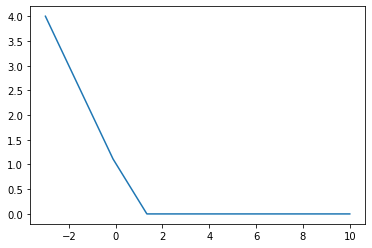

In [24]:
X = np.linspace(-3,10, 10)

Y = [max(0, 1-x) for x in X]
plt.plot(X,Y)
plt.show()

En 1, toutes les droites ayant un coefficient directeur entre -1 et 0 conviennent pour le subgradient. 

**Question 2.3** On pose : 
$$f(v,a) = \frac{1}{2}\sum_{j=1}^{m}v_j^2+ c\sum_{i=1}^{n}max(0,1-y_i(x_i^Tv +a))$$
<br> En posant : $N(v,a)=\frac{1}{2}\sum_{j=1}^{m}v_j^2$, $H=\sum_{i=1}^{n}max(0,1-y_i(x_i^Tv +a))$ et $M(v,a)=(y_i(x_i^Tv +a))_{i=1}^{n}$, on obtient le résultat. 
<br> En effet :
* M est une application de $\mathbb{R^m}\times \mathbb{R} \rightarrow \mathbb{R^n} : v,a \mapsto (y_i(x_i^Tv +a))_{i=1}^{n}$, elle est linéaire. 
* N et H sont séparables car leur somme N+H est séparable. 
<br> D'après la proposition (2.4.2) : 
$$\partial f(v,a) = \partial N(v,a) + \partial [ cH(M(v,a)) ]$$
$$\Leftrightarrow \partial f(v,a) = \partial N(v,a) + cM^T \partial H(v,a))$$
<br> 
Puisque $N(x) = \frac{1}{2}|| x ||_2^2$, la fonction N est convexe et différentiable, donc $\partial N(x) = \{\nabla N(x)\} = \{||x|| \}$. 
<br> D'après la question 2.2, $H(z) = \sum_{i=1}^{n}max(0,1-z_i) = \sum_{i=1}^{n}max(0, h(z_i)$ $$\Leftrightarrow \partial H(z) = \sum_{i=1}^{n} \partial h(z_i)$$
$$\Leftrightarrow \partial H(z) = \begin{equation}
  \left\{
      \begin{aligned}
        X_{i=1}^{n} \{-1\}\\
        X_{i=1}^{n} [-1,0]\\
        X_{i=1}^{n} \{0\}\\
      \end{aligned}
    \right.
\end{equation}$$

**Question 2.4** 